### IMPORTANDO BIBLIOTECAS

In [1]:
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

### CARREGANDO DADOS

In [54]:
df_dados = pd.read_csv('kidneyData.csv',delimiter=',')

df_dados = df_dados.sample(frac=1)

potencia = 3

df_dados['target'] = df_dados['target']**potencia
# df_dados['y2'] = df_dados['y']**potencia

df_dados

,Unnamed: 0,image_id,path,diag,target,Class
5277,5277,Normal- (679),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,1,Normal
6240,6240,Normal- (821),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,1,Normal
112,112,Tumor- (855),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,27,Tumor
3536,3536,Normal- (1314),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,1,Normal
6036,6036,Normal- (4525),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,1,Normal
...,...,...,...,...,...,...
9644,9644,Cyst- (1717),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
2993,2993,Normal- (1594),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,1,Normal
7559,7559,Stone- (783),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Stone,8,Stone
2783,2783,Normal- (1433),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,1,Normal


### INFORMAÇOES DOS DADOS

In [3]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12446 entries, 4368 to 2596
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12446 non-null  int64 
 1   image_id    12446 non-null  object
 2   path        12446 non-null  object
 3   diag        12446 non-null  object
 4   target      12446 non-null  int64 
 5   Class       12446 non-null  object
dtypes: int64(2), object(4)
memory usage: 680.6+ KB


In [73]:
df_dados['diag'].value_counts() # value counts do total de tipos de imagens
#df_dados['image_id'].value_counts() # Value counts de diagnostico por imagem
#df_dados['target'].value_counts() # Value counts de target

1     5077
0     3709
27    2283
8     1377
Name: target, dtype: int64

### VISUALIZANDO DADOS


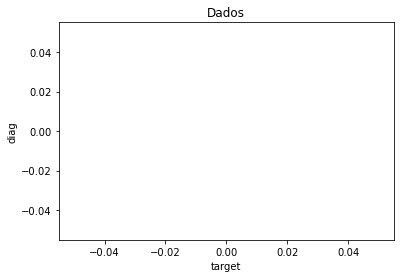

In [61]:
df_dados_c1 = df_dados[df_dados['target'] == 'C1']
df_dados_c2 = df_dados[df_dados['diag'] == 'C2']

plt.scatter(df_dados_c1['target'].array,df_dados_c1['target'].array,color='blue')
plt.scatter(df_dados_c2['diag'].array,df_dados_c2['diag'].array,color='red')
plt.title('Dados')
plt.xlabel('target')
plt.ylabel('diag')
plt.show()

### PREPARANDO DADOS

In [ ]:
target = df_dados['target'].array

df_features = df_dados.drop(columns=['target'])

df_features

,Unnamed: 0,image_id,path,diag,Class
5874,5874,Normal- (1828),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,Normal
10027,10027,Cyst- (2176),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,Cyst
4692,4692,Normal- (4365),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,Normal
11338,11338,Cyst- (1245),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,Cyst
4525,4525,Normal- (4113),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,Normal
...,...,...,...,...,...
10970,10970,Cyst- (3459),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,Cyst
8151,8151,Stone- (1366),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Stone,Stone
11136,11136,Cyst- (2237),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,Cyst
4193,4193,Normal- (5004),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,Normal


### MATRIZ DE CONFUSÃO